# Comparing various streaming platforms to see which one is best?

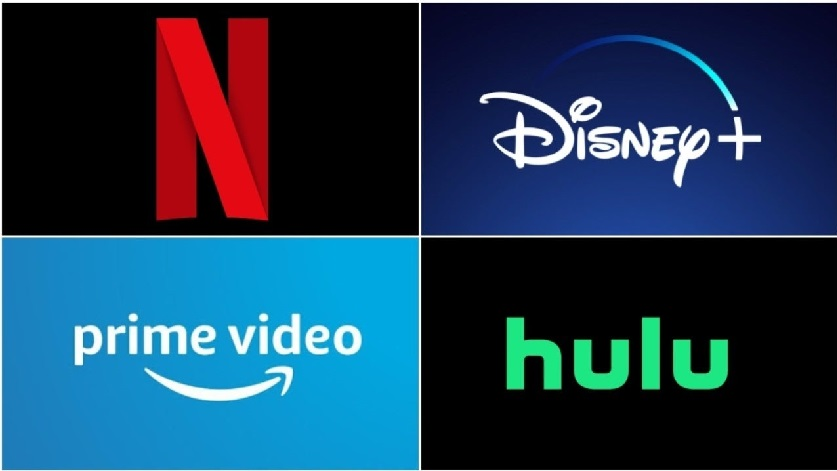

In recent years the number of online streaming platforms available has increased a lot!

Netflix, Disney+, Prime Video, hulu... what if I don't want to pay for all of them at the same time? How can I choose which service is best for me? Let's try to answer these questions.

### Setting up the environment

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib as mplot
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
#Importing the datasets
data1 = "../input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv"
data2 = "../input/tv-shows-on-netflix-prime-video-hulu-and-disney/tv_shows.csv"


mv_data = pd.read_csv(data1, index_col = 0)
tvshows_data = pd.read_csv(data2, index_col = 0)

# Data Preparation & Cleaning

Before starting to work with the data let's take a look on how the data is distributed among the columns and correct any mistakes we find. Some empty values may also need to be replaced so it does not affect our visualizations negatively. 

In [3]:
mv_data.head().append(mv_data.tail())

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [4]:
tvshows_data.head().append(tvshows_data.tail())

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


Concatenating the Movies with the TV Shows dataframe:

In [5]:
#Combining both datasets to provide ease of performing analysis
movies_data = pd.concat([mv_data, tvshows_data])

movies_data

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,type
0,1.0,Inception,2010,13+,8.8,87%,1,0,0,0,0.0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,NaN
1,2.0,The Matrix,1999,18+,8.7,87%,1,0,0,0,0.0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,NaN
2,3.0,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0.0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,NaN
3,4.0,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0.0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,NaN
4,5.0,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0.0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,NaN,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5607,NaN,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5608,NaN,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5609,NaN,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [6]:
#Checking the data types for each column
movies_data.dtypes

ID                 float64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type               float64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
type               float64
dtype: object

In [7]:
#counting the number of cells with empty values in every column
pd.isnull(movies_data).sum()

ID                  5611
Title                  0
Year                   0
Age                11836
IMDb                1732
Rotten Tomatoes    16186
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                5611
Directors           6337
Genres              5886
Country             6046
Language            6210
Runtime             6203
type               16744
dtype: int64

### Age

Looks like more than 60% of the movies don`t have data for Age in the dataset, we will replace the NaN values with 'Unknown':

In [8]:
movies_data.Age = movies_data.Age.fillna('Unknown')

In [9]:
#After this correction we only have numeric values on the Age column
movies_data.Age.value_counts()

Unknown    11836
18+         4224
7+          2310
all         1388
16+         1338
13+         1259
Name: Age, dtype: int64

### IMDb and Rotten Tomatoes columns

In [10]:
#filling NaN values with 0
movies_data.IMDb = movies_data.IMDb.fillna(0)

#stripping the % sign and converting to float to be able to perform numerical calculations
movies_data['Rotten Tomatoes'] = movies_data['Rotten Tomatoes'].str.rstrip('%').astype('float')

#Filling NaN values with 0
movies_data['Rotten Tomatoes'] = movies_data['Rotten Tomatoes'].fillna(0)

In [11]:
#Checking the data for any other anomalies
movies_data.describe()

,ID,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Runtime,type
count,16744.000000,22355.000000,22355.000000,22355.000000,22355.000000,22355.000000,22355.000000,22355.000000,16744.0,16152.000000,5611.0
mean,8372.500000,2005.023753,5.686388,18.601521,0.245627,0.118855,0.648535,0.033281,0.0,93.413447,1.0
std,4833.720789,19.041756,2.124591,33.105341,0.430468,0.323625,0.477439,0.179374,0.0,28.219222,0.0
min,1.000000,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.0
25%,4186.750000,2004.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000,1.0
50%,8372.500000,2013.000000,6.200000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000,1.0
75%,12558.250000,2016.000000,7.100000,25.000000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000,1.0
max,16744.000000,2020.000000,9.600000,100.000000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000,1.0


There seems to be a movie with a Runtime of 1256. Let's confirm if any mistakes have hapenned with this column:

In [12]:
#Checking if there are movies with more than 300 minutes of runtime
movies_data[movies_data.Runtime > 300]

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,type
4405,4406.0,Law of the Lawless,1964,Unknown,6.1,0.0,0,1,1,0,0.0,NaN,"Action,Crime,Drama",Russia,Russian,750.0,NaN
12475,12476.0,Scarlett,2016,16+,4.4,0.0,0,0,1,0,0.0,NaN,"Drama,Romance","France,United States,Germany,Italy,United King...",English,360.0,NaN
13048,13049.0,Custer's Last Stand,1936,Unknown,4.6,0.0,0,0,1,0,0.0,Elmer Clifton,"Adventure,History,Romance,War,Western",United States,English,328.0,NaN
13115,13116.0,Carlos el terrorista,1980,Unknown,6.1,0.0,0,0,1,0,0.0,NaN,"Biography,Crime,Drama,Thriller","France,Germany","English,Arabic,German,Spanish,French,Hungarian...",334.0,NaN
13179,13180.0,Colorado,1940,all,5.9,0.0,0,0,1,0,0.0,NaN,"Action,Adventure,Drama,Romance,Western",United States,English,1256.0,NaN
14113,14114.0,The Inner Circle,2009,Unknown,6.6,0.0,0,0,1,0,0.0,NaN,Drama,Sweden,Swedish,360.0,NaN
15295,15296.0,The Vatican Museums,2007,Unknown,5.0,0.0,0,0,1,0,0.0,Luca De Mata,NaN,Italy,English,410.0,NaN


This columns has some mistakes in the runtime and after filtering it out, looks like there's only 7 so it'd be easy to figure out using imdb website to correct them manually.

In [13]:
movies_data.loc[movies_data.Title == 'Law of the Lawless', ['Runtime']] = 87
movies_data.loc[movies_data.Title == 'Scarlett', ['Runtime']] = 92
movies_data.loc[movies_data.Title == 'Carlos el terrorista', ['Runtime']] = 97
movies_data.loc[movies_data.Title == 'Colorado', ['Runtime']] = 57
movies_data.loc[movies_data.Title == 'The Inner Circle', ['Runtime']] = 96

Note: Custer's Last Stand and The Vatican Museums don't need to be corrected. These two are really long so please watch at your own risk!

In [14]:
movies_data.describe()

,ID,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Runtime,type
count,16744.000000,22355.000000,22355.000000,22355.000000,22355.000000,22355.000000,22355.000000,22355.000000,16744.0,16152.000000,5611.0
mean,8372.500000,2005.023753,5.686388,18.601521,0.245627,0.118855,0.648535,0.033281,0.0,93.250557,1.0
std,4833.720789,19.041756,2.124591,33.105341,0.430468,0.323625,0.477439,0.179374,0.0,25.954224,0.0
min,1.000000,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.0
25%,4186.750000,2004.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000,1.0
50%,8372.500000,2013.000000,6.200000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000,1.0
75%,12558.250000,2016.000000,7.100000,25.000000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000,1.0
max,16744.000000,2020.000000,9.600000,100.000000,1.000000,1.000000,1.000000,1.000000,0.0,410.000000,1.0


### Language

As performed in the previous section, replacing 'NaN' with 'Unknown' here as well.

In [15]:
movies_data.Language = movies_data.Language.fillna('Unknown')

In [16]:
#checking for null values in the Language column
pd.isnull(movies_data).sum()

ID                  5611
Title                  0
Year                   0
Age                    0
IMDb                   0
Rotten Tomatoes        0
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                5611
Directors           6337
Genres              5886
Country             6046
Language               0
Runtime             6203
type               16744
dtype: int64

# Exploratory Analysis and Visualization

### Which languages are most popular in the streaming service of the dataset?

<AxesSubplot:title={'center':'Top Movie Languages on Streaming Services'}>

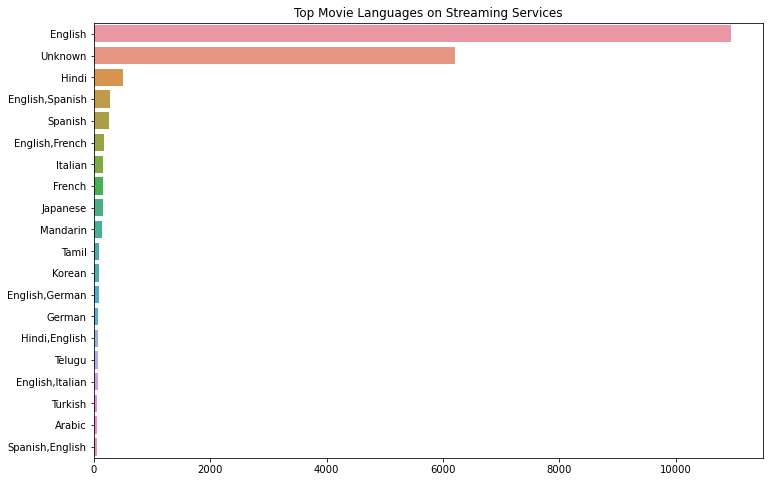

In [17]:
#counting and assigning the 20 top values to a variable
languages = movies_data.Language.value_counts().head(20)

plt.figure(figsize=(12,8))
plt.title('Top Movie Languages on Streaming Services')
sns.barplot(x=languages.values, y=languages.index)

As noticetable on the bar chart above, the top most language is English, the reason being that this data is mostly focusing on American regions rather than the whole world and that these streaming services are also American. Although these might be available in different countries with different languages using different domains. Another thing to consider is that a lot of eastern European languages are not represented here.

### Which genre appears the most?

Let's define a helper function that turns the Genres column containing lists of values separated by commas into a data frame with one column for each possible option:

In [20]:
def split_multicolumn(genres):
    result_df = genres.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in genres[genres.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [21]:
#creating a new dataframe with the splitmulticolumn function
genres_df = split_multicolumn(movies_data.Genres)

#performing a sum operation of all True values
movie_genres = genres_df.sum().sort_values(ascending=False)

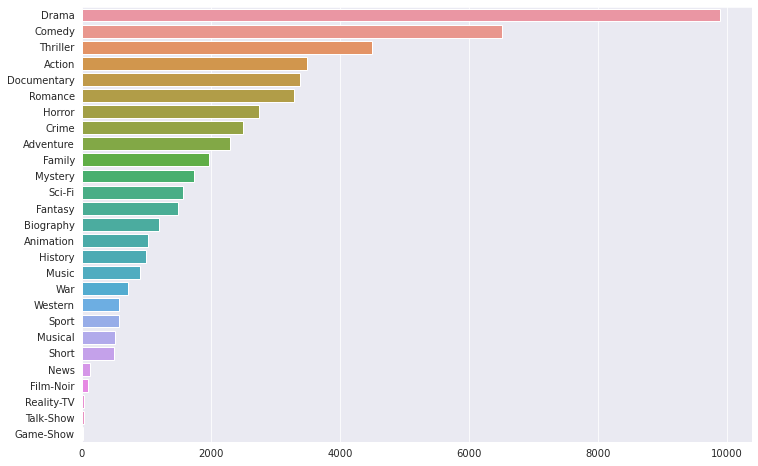

In [22]:
#plotting into a bar plot
plt.figure(figsize=(12,8))
sns.barplot(x=movie_genres.values, y=movie_genres.index);

Drama, Comedy and Thriller are the most famous genres! Action is also amongst the top ones, which was expected. I personally am surprised by the fact that the bar for Reality-TV shows, considering how much my coworkers love them hahaha.

# Asking and Answering Questions

We've already gained several insights about the available movies exploring individual columns of the dataset. Let's ask some specific questions in order to get more useful insights from this data. 

Let's obtain the following details:

1. Biggest number of movies and tv shows
2. More recent movies and tv shows
3. Most popular movie genres in each catalog
4. Better suited for for children or adults
5. The best for old movies and tv shows
6. Best IMDb / Rotten Tomatoes ratings

Before we start answering these questions, we will create individual dataframes for each platform:

In [23]:
#Creating different dataframes for each platform
Hulu_df = movies_data.loc[(movies_data['Hulu'] > 0) ]
Disney_df = movies_data.loc[(movies_data['Disney+'] > 0) ]
PrimeVideo_df = movies_data.loc[(movies_data['Prime Video'] > 0)  ]
Netflix_df = movies_data.loc[(movies_data['Netflix'] > 0)  ]

## 1. Which platform has the most number of available movies and tv shows?

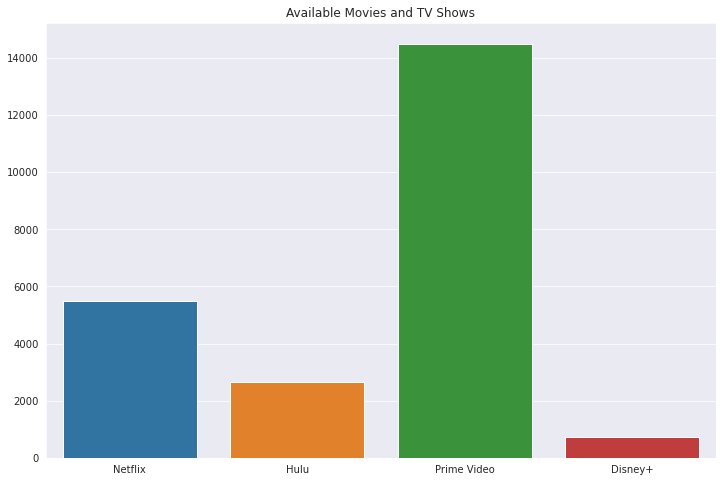

In [24]:
#Selecting the specific columns from the Dataset and saving into a new dataframe
chosen_columns = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
platforms_df = movies_data[chosen_columns]

#Counting all values for each platform
platforms = platforms_df.sum()

#Plotting into a bar plot using Seaborn

plt.figure(figsize=(12,8))
plt.title('Available Movies and TV Shows')

sns.barplot(x=platforms.index, y=platforms.values);

The results for Prime Video seem to be off the charts, followed by Netflix, Hulu and Disney which are quite lower in comparison, even if all three were combined together!

## 2. Which platform has the highest number of newest movies and tv shows?

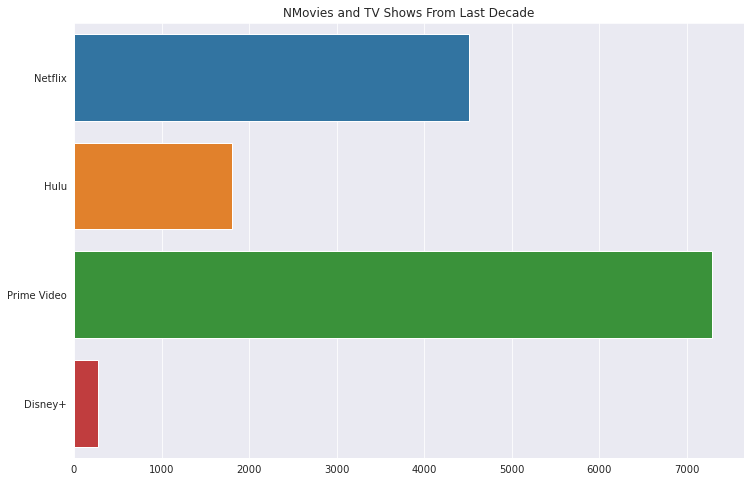

In [25]:
#filtering movies dating from 2010 beyond 
recent_movies_df = movies_data.loc[movies_data.Year > 2010]

#calculating the totals for each column
recent_movies = recent_movies_df[chosen_columns].sum()

#ploting into a barplot using seaborn
plt.figure(figsize=(12,8))
plt.title('NMovies and TV Shows From Last Decade')
sns.barplot(x=recent_movies.values, y=recent_movies.index)
plt.show()

As seen before, Prime Video tops the chart followed by Netflix, excpet this time they have much less difference between each other than observed in the previous chart, followed by Hulu and Disney.

## 3. Which platform offers more varities for each age group?

In [29]:
#Counting the number of values for each age classification
#Dropping the 'Unknown' value in the Age column so it does not affect the chart
hulu_ages = Hulu_df.Age.value_counts().drop('Unknown')

netflix_ages = Netflix_df.Age.value_counts().drop('Unknown')

primevideo_ages = PrimeVideo_df.Age.value_counts().drop('Unknown')

disney_ages = Disney_df.Age.value_counts().drop('Unknown')

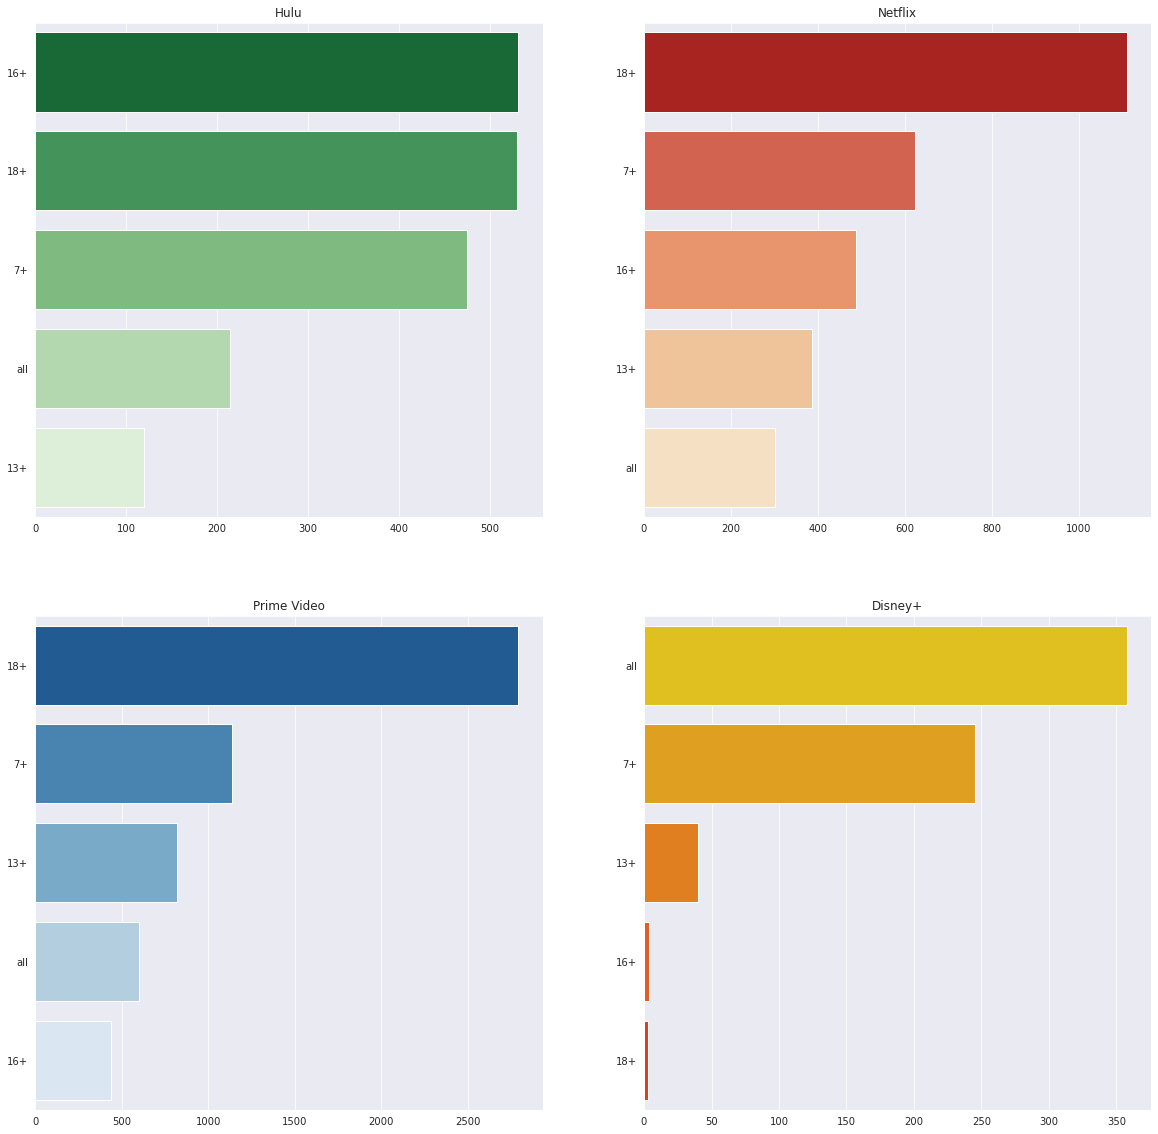

In [30]:
fig, axes = plt.subplots(2,2, figsize=(20, 20))

#setting titles
axes[0,0].set_title('Hulu')
axes[0,1].set_title('Netflix')
axes[1,0].set_title('Prime Video')
axes[1,1].set_title('Disney+')

#plotting the four barplots using seaborn
sns.barplot(x=hulu_ages.values, y=hulu_ages.index, ax=axes[0,0],palette='Greens_r')
sns.barplot(x=netflix_ages.values, y=netflix_ages.index, ax=axes[0,1], palette='OrRd_r')
sns.barplot(x=primevideo_ages.values, y=primevideo_ages.index, ax=axes[1,0], palette='Blues_r')
sns.barplot(x=disney_ages.values, y=disney_ages.index, ax=axes[1,1], palette='autumn_r')

plt.show()

Similarly to what happened with the movie genres, the count of Age classifications follows a very similar standard for Hulu, Netflix and Prime Video. Adult movies (18+) are the biggest part of their catalogs, although they also offer a good quantity of movies for children and teenagers. Disney+, however, focuses primarily on movies for the whole family and children. It is safe to say that more than 90% of its catalog can be watched by children. 

## 4. Best IMDb / Rotten Tomatoes ratings

Since Prime video has a huge difference of available movies when compared with other platforms, just comparing the quantities may not provide us with a good overview. Instead let's obtain the average IMDb ratings for each platform's movies.

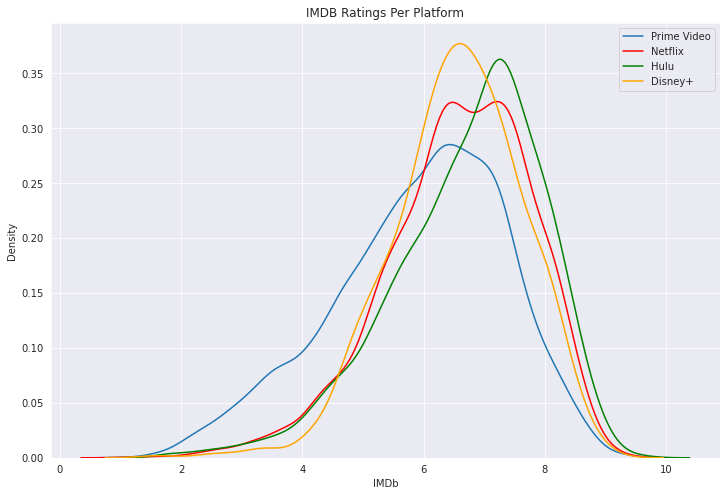

In [32]:
#Creating distinct dataframes only with the movies present on individual streaming platforms

Hulu_imdb = Hulu_df.loc[Hulu_df['IMDb'] > 0 ]
Disney_imdb = Disney_df.loc[Disney_df['IMDb'] > 0 ]
PrimeVideo_imdb = PrimeVideo_df.loc[PrimeVideo_df['IMDb'] > 0 ]
Netflix_imdb = Netflix_df.loc[Netflix_df['IMDb'] > 0 ]

#Defining plot size and title
plt.figure(figsize=(12,8))
plt.title('IMDB Ratings Per Platform')

#Plotting the information from each dataset into a KDE plot
sns.kdeplot(data=PrimeVideo_imdb['IMDb'],  legend=True)
sns.kdeplot(data=Netflix_imdb['IMDb'], color='red',  legend=True)
sns.kdeplot(data=Hulu_imdb['IMDb'], color='green',  legend=True)
sns.kdeplot(data=Disney_imdb['IMDb'], color='orange', legend=True)

#Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

Altough Prime Video is by far the platform with more available titles, it by far the last in the IMDb ratings comparison above. It is expected, thought, that such a huge catalog cannot be formed only by top rated movies/series. 

This explains why the area for titles between 2-5 ratings is much more bigger for Prime Video (blue) on the plot above. At the same time, Disney and Hulu both have a much higher average of good rated movies, respectively. Could this indicate that having the bigger catalog does not mean having the best one?

This is really surprinsing! Prime Video has a catalog several times bigger than Hulu, but still loses on the quantity of well rated movies and tv shows. Netflix is also very close to it. We can conclude that the overall quality os the Hulu and Netflix catalogs are much better. Having more movies and series does not mean having the best catalog.

Do we see similar patterns on the Rotten Tomatoes ratings?

In [35]:
#creating dataframes for the Rotten Tomatoes column excluding all empty values
Hulu_rotten_tomatoes = Hulu_df.loc[Hulu_df['Rotten Tomatoes'] != 0 ]
Disney_rotten_tomatoes = Disney_df.loc[Disney_df['Rotten Tomatoes'] != 0 ]
PrimeVideo_rotten_tomatoes = PrimeVideo_df.loc[PrimeVideo_df['Rotten Tomatoes'] != 0 ]
Netflix_rotten_tomatoes = Netflix_df.loc[Netflix_df['Rotten Tomatoes'] != 0 ]

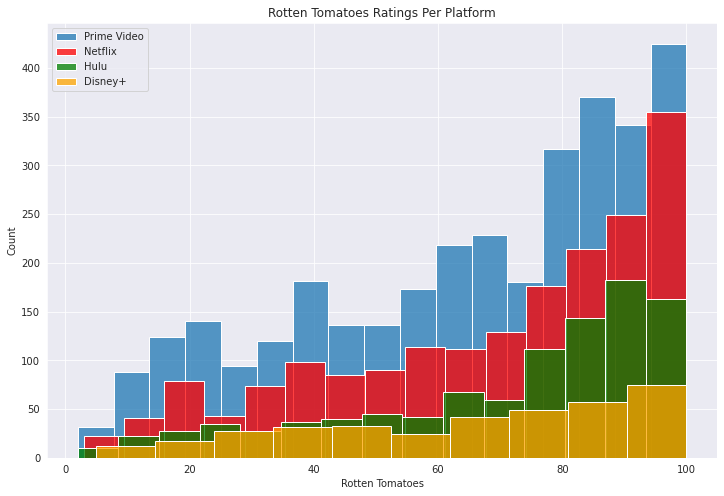

In [36]:
#Defining plot size and title
plt.figure(figsize=(12,8))
plt.title('Rotten Tomatoes Ratings Per Platform')

#Plotting the information from each dataset into a KDE plot
sns.histplot(PrimeVideo_rotten_tomatoes['Rotten Tomatoes'], kde=False,  legend=True)
sns.histplot(Netflix_rotten_tomatoes['Rotten Tomatoes'], kde=False, color='red',  legend=True)
sns.histplot(Hulu_rotten_tomatoes['Rotten Tomatoes'], kde=False, color='green',  legend=True)
sns.histplot(Disney_rotten_tomatoes['Rotten Tomatoes'], kde=False, color='orange', legend=True)

#Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

The pattern here is bit different. Netflix comes second to Prime Video and Hulu comes third.  We can also find something interesting by getting the mean of Rotten Tomatoes ratings for each:

# Inferences

We've obtained some interesting inferences from this dataset. Here's a summary of them:

* **Quantity of Movies**: Prime Video is by far the service with more movies and tv shows, followed by Netflix. Netflix, Hulu and Disney+ together still don't reach half the quantity of movies available on Prime Video.
* **Recent Titles**: Prime Video is also the catalog with the biggest quantity of recent movies (10 years old or less). But this represents only 50% of its catalog. On the other hand, Netflix and Hulu have a much bigger percentage of their catalogs composed by recent movies - 82% and 67% respectively. And Disney+ has surprisingly only 36%! Which means their movie catalog is currently mostly of classics.
* **Genres**: Hulu, Netflix and PrimeVideo have very similar quantities for the top genres, with Drama, Comedy and Thriller being the top three ones. Disney+ has a different catalog, with Family, Adventure, Fantasy, Animation and Musical being the most predomintant genres. 
* **Age**: Adult movies (18+) is the biggest part of the Netflix, Prime Video and Hulu catalogs, although they also offer a good quantity of movies for children and teenagers. Disney+, focuses primarily on movies for the whole family and children. It is safe to say that more than 90% of its catalog can be watched by children.
* **Movie Ratings**: Hulu has the best mean ratings for both IMDB and Rotten Tomatoes.  All platforms offer a good quantity of well rated movies in their catalog. However, the Prime Video ratings mean is much lower compared to the other platforms. We can conclude that the overall quality os the Hulu and Netflix catalogs are much better. Having more movies and series does not mean having the best catalog.

# Conclusions:

What can help me decide between a specific platform?

* If you are interested on having a **huge catalog** Prime Video is definitely a good choice. Netflix comes second and is also a good choice - both have a big catalog!
* For watching **recent movies and tv shows** (last decade), Netflix is a great option - those compose 81% of its catalog. Hulu also has a good percentage of 67%.
* If you are interested in movies for **Adult**s, and genres such as Dramas, Comedies and Thriller, Netflix , Hulu  and Prime Video are all good options. 
* Disney+ is defintely a great choice for **family friendly** movies and genres such as fantasy and adventure.
* Hulu has a smaller catalog, but it comes first on the ratings mean. If you are interested in having a **small catalog with good quality stuff**, Hulu may be the best choice. Disney+ also has a small catalog while keeping a good overall quality. Its catalog should increase during the next years since it is a new service. Netflix is a good middle term between having a big catalog x quality. Prime Video comes last on ratings, a consequence of having such a huge catalog.